In [10]:
import math
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from __future__ import print_function
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
warnings.filterwarnings('ignore',module = 'sklearn')

df = pd.read_csv('Desktop/ethylene_CO.txt', delim_whitespace=True, skiprows=[0], header=None)
df = df.rename(columns = {0:'Time (seconds)', 1:'CO conc (ppm)', 2:'Ethylene conc (ppm)', 3:'Sensor1',4:'Sensor2',5:'Sensor3',6:'Sensor4',7:'Sensor5',8:'Sensor6',9:'Sensor7',10:'Sensor8',11:'Sensor9',12:'Sensor10',13:'Sensor11',14:'Sensor12',15:'Sensor13',16:'Sensor14',17:'Sensor15',18:'Sensor16'})


In [11]:
df.head()

,Time (seconds),CO conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
0,0.00,0.0,0.0,-50.85,-1.95,-41.82,1.30,-4.07,-28.73,-13.49,-3.25,55139.95,50669.50,9626.26,9762.62,24544.02,21420.68,7650.61,6928.42
1,0.01,0.0,0.0,-49.40,-5.53,-42.78,0.49,3.58,-34.55,-9.59,5.37,54395.77,50046.91,9433.20,9591.21,24137.13,20930.33,7498.79,6800.66
2,0.01,0.0,0.0,-40.04,-16.09,-27.59,0.00,-7.16,-42.14,-12.52,-5.86,53960.02,49299.30,9324.40,9449.81,23628.90,20504.94,7369.67,6697.47
3,0.03,0.0,0.0,-47.14,-10.57,-32.28,4.40,-11.22,-37.94,-7.16,-1.14,53047.71,48907.00,9170.64,9305.58,23101.66,20101.42,7285.13,6578.52
4,0.04,0.0,0.0,-33.58,-20.79,-33.25,6.03,3.42,-34.22,-14.46,8.31,52700.28,48330.96,9073.64,9163.47,22689.54,19694.07,7156.74,6468.32


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time (seconds),4208261.0,21044.590636,12149.981299,0.00,10521.23,21045.91,31566.78,42087.55
CO conc (ppm),4208261.0,127.620212,160.777249,0.00,0.00,0.00,266.67,533.33
Ethylene conc (ppm),4208261.0,5.320436,5.624127,0.00,0.00,6.67,10.00,20.00
Sensor1,4208261.0,2065.616641,790.260877,-52.62,1323.47,1789.09,2869.44,3553.64
Sensor2,4208261.0,506.218365,1530.128267,-36.49,9.12,38.89,158.90,28116.51
Sensor3,4208261.0,4372.538655,1608.017952,-45.04,2986.96,4494.33,5658.29,8641.34
Sensor4,4208261.0,4799.249607,1733.016940,-8.94,3282.31,4946.72,6178.21,9221.02
Sensor5,4208261.0,1894.957168,439.537263,-12.19,1503.46,1984.55,2262.74,2904.04
Sensor6,4208261.0,2214.692483,435.398721,-42.14,1856.65,2272.78,2566.47,3502.11
Sensor7,4208261.0,5086.639480,1966.451294,-23.22,3241.95,5224.88,6719.28,9883.50


In [4]:
#Using MinMax
msc = MinMaxScaler()

df = pd.DataFrame(msc.fit_transform(df),columns = df.columns)

y_co2 = 'CO conc ppm)'
feature_cols = [x for x in df.columns if x != y_co2]
X_data = df[feature_cols]
y_data_co2 = df[y_co2]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_co2,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(LR,parameters, cv=3)
grid.fit(X_train, y_train)

print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

minmaxscaler_r2 = grid.best_score_
minmaxscaler_residual = np.mean((grid.predict(X_test) - y_test) ** 2)
minmaxscaler_squared = mean_squared_error(y_test,grid.predict(X_test))

r2 / variance :  0.6888462682887285
Residual sum of squares: 0.03


In [5]:
grid.best_estimator_

LinearRegression()

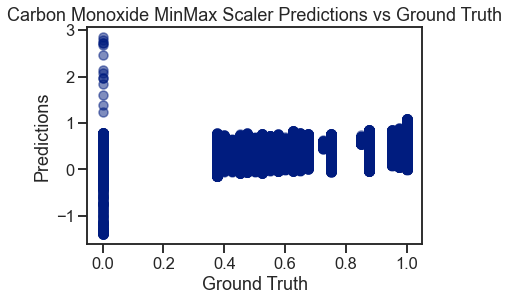

In [7]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Carbon Monoxide MinMax Scaler Predictions vs Ground Truth');

In [25]:
#Using Std Scaler
std = StandardScaler()

df = pd.DataFrame(std.fit_transform(df),columns = df.columns)

y_co2 = 'CO conc (ppm)'
feature_cols = [x for x in df.columns if x != y_co2]
X_data = df[feature_cols]
y_data_co2 = df[y_co2]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_co2,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(LR,parameters, cv=3)
grid.fit(X_train, y_train)

print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

stdscaler_r2 = grid.best_score_
stdscaler_residual = np.mean((grid.predict(X_test) - y_test) ** 2)
stdscaler_squared = mean_squared_error(y_test,grid.predict(X_test))

r2 / variance :  0.6888462880627936
Residual sum of squares: 0.31


In [26]:
grid.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

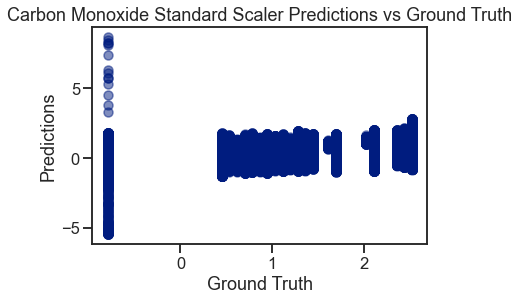

In [27]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Carbon Monoxide Standard Scaler Predictions vs Ground Truth');

In [28]:
mabs = MaxAbsScaler()

df = pd.DataFrame(std.fit_transform(df),columns = df.columns)

y_co2 = 'CO conc (ppm)'
feature_cols = [x for x in df.columns if x != y_co2]
X_data = df[feature_cols]
y_data_co2 = df[y_co2]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_co2,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(LR,parameters, cv=3)
grid.fit(X_train, y_train)

print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

maxabscaler_r2 = grid.best_score_
maxabsscaler_residual = np.mean((grid.predict(X_test) - y_test) ** 2)
maxabscaler_squared = mean_squared_error(y_test,grid.predict(X_test))

r2 / variance :  0.6888462880627936
Residual sum of squares: 0.31


In [29]:
grid.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

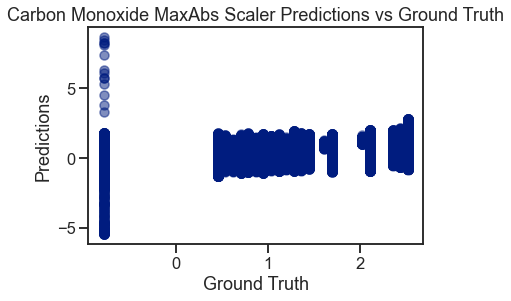

In [30]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Carbon Monoxide MaxAbs Scaler Predictions vs Ground Truth');

In [31]:
Variance_C02 = {'MinMaxScaler - C02' : minmaxscaler_r2,
           'StandardScaler - C02': stdscaler_r2,
           'MaxAbsScaler - C02' : maxabscaler_r2}

Residual_Sum_of_Squares_C02 = {'MinMaxScaler - C02' :minmaxscaler_residual,
           'StandardScaler - C02': stdscaler_residual,
           'MaxAbsScaler - C02' : maxabsscaler_residual}
Mean_Squared_Error_C02 = {'MinMaxScaler - C02': minmaxscaler_squared,
           'StandardScaler - C02': stdscaler_squared,
           'MaxAbsScaler - C02' : maxabscaler_squared}

print(Variance_C02)

print(Residual_Sum_of_Squares_C02)

print(Mean_Squared_Error_C02)

{'MinMaxScaler - C02': 0.6888462682887285, 'StandardScaler - C02': 0.6888462880627936, 'MaxAbsScaler - C02': 0.6888462880627936}
{'MinMaxScaler - C02': 0.02833745120464486, 'StandardScaler - C02': 0.31181982832030336, 'MaxAbsScaler - C02': 0.31181982832030414}
{'MinMaxScaler - C02': 0.028337451204644346, 'StandardScaler - C02': 0.31181982832031424, 'MaxAbsScaler - C02': 0.3118198283203149}


In [32]:
#MinMax Scaler
msc = MinMaxScaler()

df = pd.DataFrame(msc.fit_transform(df),columns = df.columns)

y_eth = 'Ethylene conc (ppm)'
feature_cols = [x for x in df.columns if x != y_eth]
X_data = df[feature_cols]
y_data_eth = df[y_eth]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_eth,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_eth = GridSearchCV(LR,parameters, cv=3)
grid_eth.fit(X_train, y_train)

print ("r2 / variance : ", grid_eth.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_eth.predict(X_test) - y_test) ** 2))

minmaxscaler_r2_eth = grid_eth.best_score_
minmaxscaler_residual_eth = np.mean((grid_eth.predict(X_test) - y_test) ** 2)
minmaxscaler_squared_eth = mean_squared_error(y_test,grid_eth.predict(X_test))

r2 / variance :  0.6470544864072582
Residual sum of squares: 0.03


In [33]:
grid_eth.best_estimator_

LinearRegression(normalize=True)

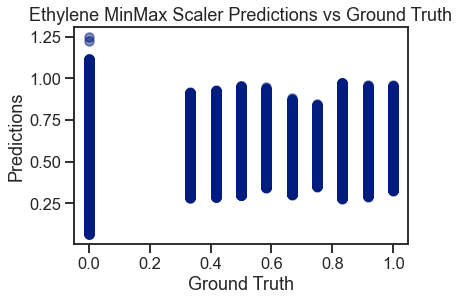

In [34]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Ethylene MinMax Scaler Predictions vs Ground Truth');

In [35]:
std = StandardScaler()

df = pd.DataFrame(std.fit_transform(df),columns = df.columns)

y_eth = 'Ethylene conc (ppm)'
feature_cols = [x for x in df.columns if x != y_eth]
X_data = df[feature_cols]
y_data_eth = df[y_eth]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_eth,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_eth = GridSearchCV(LR,parameters, cv=3)
grid_eth.fit(X_train, y_train)

print ("r2 / variance : ", grid_eth.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_eth.predict(X_test) - y_test) ** 2))

stdscaler_r2_eth = grid_eth.best_score_
stdscaler_residual_eth = np.mean((grid_eth.predict(X_test) - y_test) ** 2)
stdscaler_squared_eth = mean_squared_error(y_test,grid_eth.predict(X_test))

r2 / variance :  0.647054535847171
Residual sum of squares: 0.35


In [36]:
grid_eth.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

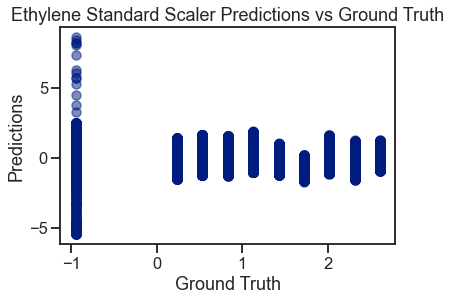

In [37]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Ethylene Standard Scaler Predictions vs Ground Truth');

In [38]:
mabs = MaxAbsScaler()

df = pd.DataFrame(mabs.fit_transform(df),columns = df.columns)

y_eth = 'Ethylene conc (ppm)'
feature_cols = [x for x in df.columns if x != y_eth]
X_data = df[feature_cols]
y_data_eth = df[y_eth]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_eth,
                                                    test_size=0.3, random_state=42)

LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_eth = GridSearchCV(LR,parameters, cv=3)
grid_eth.fit(X_train, y_train)

print ("r2 / variance : ", grid_eth.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_eth.predict(X_test) - y_test) ** 2))

maxabscaler_r2_eth = grid_eth.best_score_
maxabscaler_residual_eth = np.mean((grid_eth.predict(X_test) - y_test) ** 2)
maxabscaler_squared_eth = mean_squared_error(y_test,grid_eth.predict(X_test))

r2 / variance :  0.647054535847171
Residual sum of squares: 0.05


In [39]:
grid_eth.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

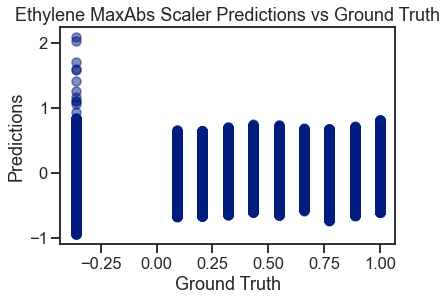

In [40]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test,grid.predict(X_test),alpha=0.5)

ax.set(xlabel='Ground Truth',
      ylabel = 'Predictions',
      title = 'Ethylene MaxAbs Scaler Predictions vs Ground Truth');

In [41]:
Variance_Eth = {'MinMaxScaler - Ethylene' : minmaxscaler_r2_eth,
           'StandardScaler - Ethylene': stdscaler_r2_eth,
           'MaxAbsScaler - Ethylene' : maxabscaler_r2_eth}

Residual_Sum_of_Squares_Eth = {'MinMaxScaler - Ethylene' :minmaxscaler_residual_eth,
           'StandardScaler - Ethylene': stdscaler_residual_eth,
           'MaxAbsScaler - Ethylene' : maxabscaler_residual_eth}
Mean_Squared_Error_Eth = {'MinMaxScaler - Ethylene': minmaxscaler_squared_eth,
           'StandardScaler - Ethylene': stdscaler_squared_eth,
           'MaxAbsScaler - Ethylene' : maxabscaler_squared_eth}

print(Variance_Eth)

print(Residual_Sum_of_Squares_Eth)

print(Mean_Squared_Error_Eth)

{'MinMaxScaler - Ethylene': 0.6470544864072582, 'StandardScaler - Ethylene': 0.647054535847171, 'MaxAbsScaler - Ethylene': 0.647054535847171}
{'MinMaxScaler - Ethylene': 0.02786915339581456, 'StandardScaler - Ethylene': 0.3524305362157047, 'MaxAbsScaler - Ethylene': 0.051731783794027014}
{'MinMaxScaler - Ethylene': 0.0278691533958143, 'StandardScaler - Ethylene': 0.3524305362156788, 'MaxAbsScaler - Ethylene': 0.051731783794027854}
